<a href="https://colab.research.google.com/github/DommiiUdomp/Dommii/blob/main/eusat_new_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds


In [91]:
ds, info = tfds.load('eurosat', split='train', with_info=True)
image, label = tfds.as_numpy(tfds.load('eurosat', split='train', batch_size=-1, as_supervised=True))

print(type(image), image.shape)

<class 'numpy.ndarray'> (27000, 64, 64, 3)


In [92]:
label_Dict = dict(zip(np.unique(label), info.features["label"].names))
print(label_Dict)

label_names, label_y = np.unique(label, return_inverse=True)
aa = np.array(np.unique(label_y, return_counts=True)).T
bb = np.array(info.features["label"].names)

{0: 'AnnualCrop', 1: 'Forest', 2: 'HerbaceousVegetation', 3: 'Highway', 4: 'Industrial', 5: 'Pasture', 6: 'PermanentCrop', 7: 'Residential', 8: 'River', 9: 'SeaLake'}


# **Visualize the data**

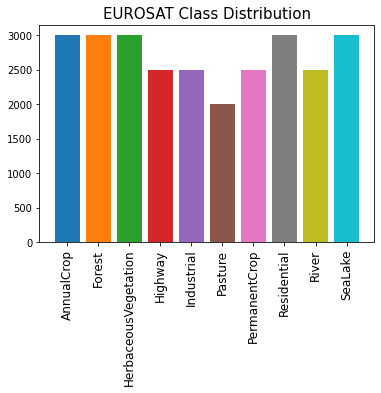

In [93]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread, imshow, subplots, show

fig = plt.plot(figsize = (10,5))
for i in range(len(bb)) :
  xx, hh = aa[i]
  plt.bar(bb[i], hh, align='center')
  plt.xticks(fontsize=12, rotation=90)
  plt.title('EUROSAT Class Distribution', fontsize=15);

plt.show()

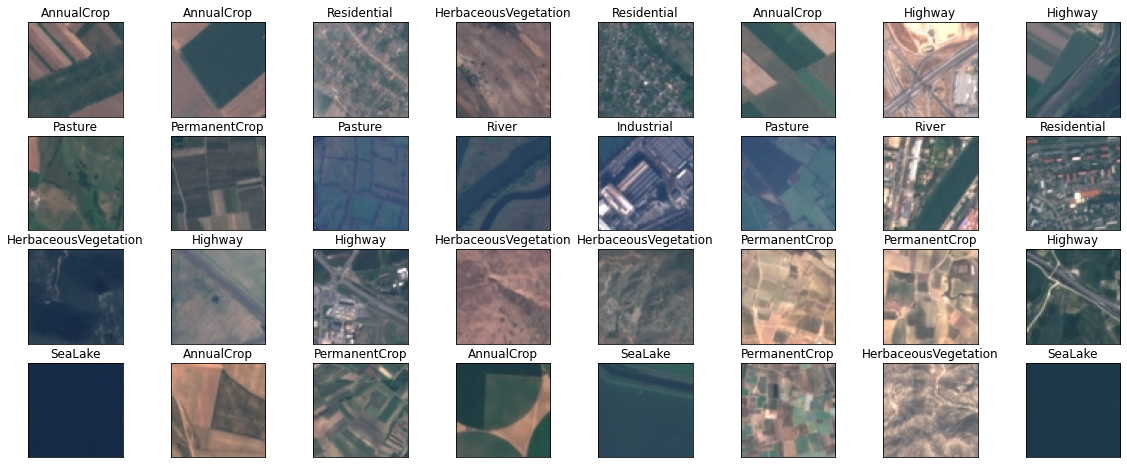

In [94]:
#Plot prepared Data
def random_plot(X,y):
  num_test_images = X.shape[0]
  random_inx = np.random.choice(num_test_images, 32)
  random_test_images = X[random_inx, ...]
  random_test_labels = y[random_inx, ...]
  
  plt.figure(figsize=(20, 8))
  for i in range(32):
    plt.subplot(4, 8, i+1, xticks=[], yticks=[])
    plt.imshow(random_test_images[i])
    plt.title(label_Dict[random_test_labels[i]])

  plt.show()

random_plot(image,label)

In [95]:
from sklearn.utils import shuffle

smallest_class = np.argmin(np.bincount(label)) # find the smallest class
print(f' the smallest class: {smallest_class}')

num_classes = len(np.array(np.unique(label))) # number of classes
print(f' the number of classes: {num_classes}')

smallest_class_obs = np.where(label == smallest_class)[0] # observations in smallest class
print(f' observations in smallest class:{smallest_class_obs.shape}')

# Get 2000 observations from each class
indBal = np.empty(0, dtype=int)
for i in range(num_classes):
  indTemp = shuffle(np.where(label == i)[0], random_state=42)[0:smallest_class_obs.shape[0]]
  indBal = np.concatenate([indBal, indTemp])

# shuffle the balanced index
indBal = shuffle(indBal, random_state = 101)

 the smallest class: 5
 the number of classes: 10
 observations in smallest class:(2000,)


In [96]:
#Make dataset balance
label_bal = label[indBal]
image_bal = image[indBal]

print(label_bal.shape)
print(image_bal.shape)

(20000,)
(20000, 64, 64, 3)


In [97]:
#preprocessing
from sklearn.model_selection import StratifiedShuffleSplit

splite = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=101)
print(splite.get_n_splits(image_bal, label_bal))

for train_index, test_index in splite.split(image_bal, label_bal):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = image_bal[train_index], image_bal[test_index]
  y_train, y_test = label_bal[train_index], label_bal[test_index]

1
TRAIN: [13766  8905  5176 ... 12158  1555 10242] TEST: [16086  3312 14479 ... 14168  9997 14857]


In [ ]:
from tensorflow.keras.utils import to_categorical

X_train = X_train.astype('float64') # Convert train and test images into 'float64' type
X_test = X_test.astype('float64')
#Normalize the images data #minimum and maximum values equal to 0 and 1 respectively.
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

y_train = y_train.astype('int64') # Convert train and test labels into 'int64' type
y_test = y_test.astype('int64')
# convert class vectors to binary class matrices
y_train_class = to_categorical(y_train, num_classes)
y_test_class = to_categorical(y_test, num_classes)

print(f'Min: {X_train.min()}, Max: {X_train.max()}')
print(f'New_Min: {X_train_scaled.min()}, New_Max: {X_train_scaled.max()}')

In [ ]:
#Grey Image
from skimage.color import rgb2gray

#Create an RGB representation of a gray-level image.
# convert RGB arrays to grayscale
for i in range(X_train.shape[0]):
  X_train_BW[i] = rgb2gray(X_train_scaled[i])

for i in range(X_test_scaled.shape[0]):
  X_test_BW[i] = rgb2gray(X_test_scaled[i])

# flatten grayscale arrays
X_train_BW = X_train_BW.reshape(X_train_BW.shape[0],
                                X_train_BW.shape[1] * X_train_BW.shape[2])

X_test_BW = X_test_BW.reshape(X_test_BW.shape[0],
                              X_test_BW.shape[1] * X_test_BW.shape[2])

print(X_train_BW.shape)
print(X_test_BW.shape)
print(y_train_class.shape)
print(y_test_class.shape)

In [ ]:
random_plot(X_train_BW,y_train)

In [ ]:
#Plot compare
fig, ax = plt.subplots(1, 5, figsize=(15, 4))

a = np.random.choice(X_train_scaled.shape[0])
ax[0].imshow(X_train_scaled[a])
ax[0].set_title("Original")
ax[1].imshow(X_train_BW[a], cmap=plt.cm.gray)
ax[1].set_title("Grayscale")
R = X_train_scaled[a]
ax[2].imshow(R[:,:,0])
ax[2].set_title("Red")
ax[3].imshow(R[:,:,1])
ax[3].set_title("Green")
ax[4].imshow(R[:,:,2])
ax[4].set_title("Blue")

fig.tight_layout()
print(label_Dict[label[a]])
plt.show()

# **Build model**

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import BatchNormalization, Normalization, Dropout, Input
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers.merge import concatenate

In [ ]:
from sklearn.model_selection import train_test_split

X_train_1, X_train_2, y_train_1, y_train_2 = train_test_split(X_train_scaled, y_train_class, stratify = y_train_class, test_size = 0.5, random_state=101)
X_test_1, X_test_2, y_test_1, y_test_2 = train_test_split(X_test_scaled, y_test_class, stratify = y_test_class, test_size = 0.5, random_state=101)
print(X_train_1.shape)
print(X_train_2.shape)
print(y_train_1.shape)
print(y_train_2.shape)

In [ ]:
def model(input_shape) :

  # first input model
  head_1 = Input(shape=input_shape)
  cnn1 = Dense(256, activation='relu')(head_1)
  cnn1 = Flatten()(cnn1)

  # second input model
  head_2 = Input(shape=input_shape)
  cnn2 = Dense(128, activation='relu')(head_2)
  cnn2 = Flatten()(cnn2)

  # merge input models
  merge = concatenate([cnn1, cnn2])
  dense = Dense(64, activation='relu')(merge)
  output = Dense(num_classes, activation='relu')(dense)


  model = Model(inputs=[head_1, head_2], outputs=output)
  model.compile (optimizer = tf.keras.optimizers.Adam(learning_rate=1e-6) ,
               loss = tf.keras.losses.CategoricalCrossentropy(), 
               metrics = [tf.keras.metrics.CategoricalAccuracy()])
  model.summary()  
  
  return model

In [ ]:
model = model(X_train_scaled[0].shape)
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit([X_train_1, X_train_2],y_train_1, validation_data= ([X_test_1, X_test_2], y_test_1),
                    batch_size=64 , epochs=100, verbose=1)

score = model.evaluate([X_train_1, X_train_2], y_test_1, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
def plot_history(model, history) :
  plt.figure(figsize=(10,5))
  ax1 = plt.subplot(121)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Loss vs. epochs')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Training','Validation'],loc='lower left')
  ax2 = plt.subplot(122)
  plt.plot(history.history['categorical_accuracy'])
  plt.plot(history.history['val_categorical_accuracy'])
  plt.title('Accuracy vs. epochs')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Training','Validation'],loc='lower right')
  plt.tight_layout()
  plt.show()

In [ ]:
# Define functions for evaluating model accuracy by class and overall

def eval_model_by_class(model, test_set):
  y_test_pred = model.predict(test_set)
  y_test_pred_tmp=np.argmax(y_test_pred,axis=1)

  y_test_true = [label_Dict[x] for x in y_test_true_tmp]
  y_test_pred = [label_Dict[x] for x in y_test_pred_tmp]

  pred_df = pd.DataFrame({'y_true': y_test_true, 'y_pred': y_test_pred})
  pred_df['accurate_preds'] = pred_df.y_true == pred_df.y_pred
  pred_df = pred_df.groupby(['y_true']).sum().reset_index()
  pred_df['label_count'] = label_count
  pred_df['class_acc'] = pred_df.accurate_preds / pred_df.label_count
  pred_df = pred_df.sort_values(by = 'class_acc').reset_index()
  pred_df['overall_acc'] = sum(pred_df.accurate_preds) / sum(pred_df.label_count)
  pred_df = pred_df.sort_values('y_true').reset_index(drop = True)

  return(pred_df)

def find_wrong_preds(model, test_set):
  y_test_pred = model.predict(test_set)
  y_test_pred_tmp=np.argmax(y_test_pred,axis=1)

  y_test_true = [label_Dict[x] for x in y_test_true_tmp]
  y_test_pred = [label_Dict[x] for x in y_test_pred_tmp]

  pred_df = pd.DataFrame({'y_true': y_test_true, 'y_pred': y_test_pred})
  pred_df['accurate_preds'] = pred_df.y_true == pred_df.y_pred
  # pred_df = pred_df.sort_values('y_true').reset_index(drop = True)
  pred_df = pred_df.sort_values('y_true')

  return(pred_df)

# **Vgg16 model**

In [ ]:
from tensorflow.keras.applications import vgg16

conv_base = vgg16.VGG16(include_top=False, weights=None, input_shape = (X_train_scaled[0].shape))
conv_base.summary()

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(conv_base, show_shapes=True, show_layer_names=True)

# **Vgg 19 Model**

In [ ]:
from tensorflow.keras.applications import vgg19

conv_basevgg19 = vgg19.VGG19(include_top=False, weights=None, input_shape = (X_train_scaled[0].shape))
conv_basevgg19.summary()

In [ ]:
from tensorflow.keras.applications import resnet_v2

conv_baseresnet = resnet_v2.ResNet152V2(include_top=False, weights=None, input_shape = (X_train_scaled[0].shape))
conv_baseresnet.summary()